Positive DataFrame sample:
     word sentiment  count
0   thank  positive   2401
1     yes  positive   2225
2  thanks  positive   1155
3    love  positive   1151
4      gm  positive    970

Negative DataFrame sample:
    word sentiment  count
0   cant  negative    617
1   dont  negative    559
2  whats  negative    518
3    hes  negative    327
4   fuck  negative    167


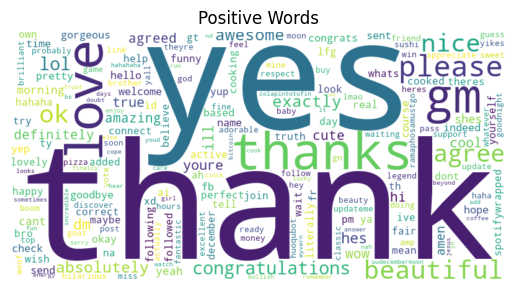

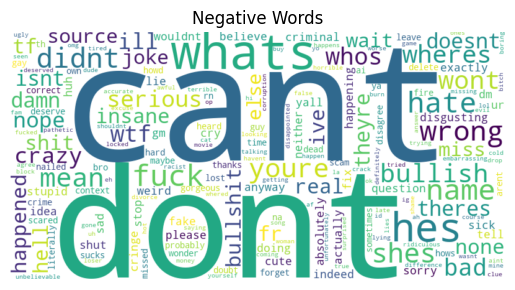

In [5]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Read and Parse Spark Output Files
def load_spark_output(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                # Each line looks like: ('thank', 'positive', 2401)
                word, sentiment, count = ast.literal_eval(line)
                rows.append((word, sentiment, count))
    # Convert list of tuples → pandas DataFrame
    df = pd.DataFrame(rows, columns=["word", "sentiment", "count"])
    return df

spark_output_relative_path = "../spark_analysis/output/"

pos_df = load_spark_output(f"{spark_output_relative_path}top_200_positive_words.txt")
neg_df = load_spark_output(f"{spark_output_relative_path}top_200_negative_words.txt")

# Print sample
print("Positive DataFrame sample:")
print(pos_df.head())
print("\nNegative DataFrame sample:")
print(neg_df.head())

# 2. Generate WordClouds
def plot_wordcloud_from_df(df, title):
    # Convert (word, count) to a dictionary for the word cloud
    freq_dict = dict(zip(df["word"], df["count"]))

    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq_dict)


    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis("off")
    plt.show()      # Show on screen

# 3. Plot WordClouds for positive & negative
plot_wordcloud_from_df(pos_df, "Positive Words")
plot_wordcloud_from_df(neg_df, "Negative Words")
